BOUSSOUAR Feriel
CORVEST Alex
LEBRET Thomas 
MANSOURI Marc

# Énoncé du projet 


## A.1. Chargement des données

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sklearn.decomposition
import seaborn as sns


import sklearn
import sklearn.decomposition
import sklearn.svm
import sklearn.neighbors

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

## A.2. Exploration préliminaire

Jetez un oeil aux données, en tracant par exemple les distributions $P(x_d)$ pour chaque attribut $x_d$, regardez la distribution des $y$ (proportion des classes si c'est une classif, etc).

Aide: regardez le code au début de `2022-40-exemple-RegLin-CM.ipynb`, plein de tracés y sont faits. Aussi, dans le code du problème des champignons.

Identifiez les attributs qu'il va falloir ré-encoder, les désequilibres potentiels entre les classes, etc.

> La première chose à faire consiste à se donner un aperçu des données. En général les datasets fournis en
ligne viennent avec une petite présentation et parfois quelques visualisations, mais il est recommandé de faire
vous même quelques fonctions permettant d’avoir un aperçu des données/une donnée, afin d’avoir une idée des
problèmes qui vont se poser (et comme outil de débug). Vous pouvez aussi utiliser des outils autres (comme
t-SNE), sans forcément les maîtriser à fond, dans cette phase exploratoire.
Si les données vous semblent de trop mauvaise qualité, ou que la tâche est trop ardue, changez de données!



In [2]:
filename = "pokemon.csv"
names = ['ID', 'NAME', 'TYP1', 'TYP2', 'HP', 'ATK', 'DEF', 'SP.ATK', 'SP.DEF', 'SPE', 'GEN', 'LEG']
dataset = pd.read_csv(filename, names=names)
dataset.head(5)

,ID,NAME,TYP1,TYP2,HP,ATK,DEF,SP.ATK,SP.DEF,SPE,GEN,LEG
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [3]:
print(dataset.shape)

features = dataset.columns[:-1]
label = dataset.columns[-1]

X = dataset[features].values
Y = dataset[label].values

X.shape, Y.shape

(800, 12)


((800, 11), (800,))

In [4]:
#La commande "describe" est assez magique.. elle calcule des fréquences, 
#ou des stats plus quantitatives, selon les données présentes
#description des donnéess
dataset.describe(include = 'all') 

,ID,NAME,TYP1,TYP2,HP,ATK,DEF,SP.ATK,SP.DEF,SPE,GEN,LEG
count,800.0000,799,800,414,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800
unique,NaN,799,18,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,Bulbasaur,Water,Flying,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,NaN,1,112,97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735
mean,400.5000,NaN,NaN,NaN,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,NaN
std,231.0844,NaN,NaN,NaN,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,NaN
min,1.0000,NaN,NaN,NaN,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,NaN
25%,200.7500,NaN,NaN,NaN,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,NaN
50%,400.5000,NaN,NaN,NaN,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,NaN
75%,600.2500,NaN,NaN,NaN,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,NaN


In [5]:
#verification de valeurs non-nulles
#informations sur les données
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      800 non-null    int64 
 1   NAME    799 non-null    object
 2   TYP1    800 non-null    object
 3   TYP2    414 non-null    object
 4   HP      800 non-null    int64 
 5   ATK     800 non-null    int64 
 6   DEF     800 non-null    int64 
 7   SP.ATK  800 non-null    int64 
 8   SP.DEF  800 non-null    int64 
 9   SPE     800 non-null    int64 
 10  GEN     800 non-null    int64 
 11  LEG     800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [6]:
#renvoie le nombre de valeurs null dans l'ensemble du dataset.
dataset.isnull().sum()


ID          0
NAME        1
TYP1        0
TYP2      386
HP          0
ATK         0
DEF         0
SP.ATK      0
SP.DEF      0
SPE         0
GEN         0
LEG         0
dtype: int64

In [7]:
#accéder a la colonne Legendary
print(dataset['LEG'])

0      False
1      False
2      False
3      False
4      False
       ...  
795     True
796     True
797     True
798     True
799     True
Name: LEG, Length: 800, dtype: bool


In [8]:
len(dataset['NAME'].unique()) # nombre de noms uniques dans le dataset

800

Text(0, 0.5, 'Frequency')

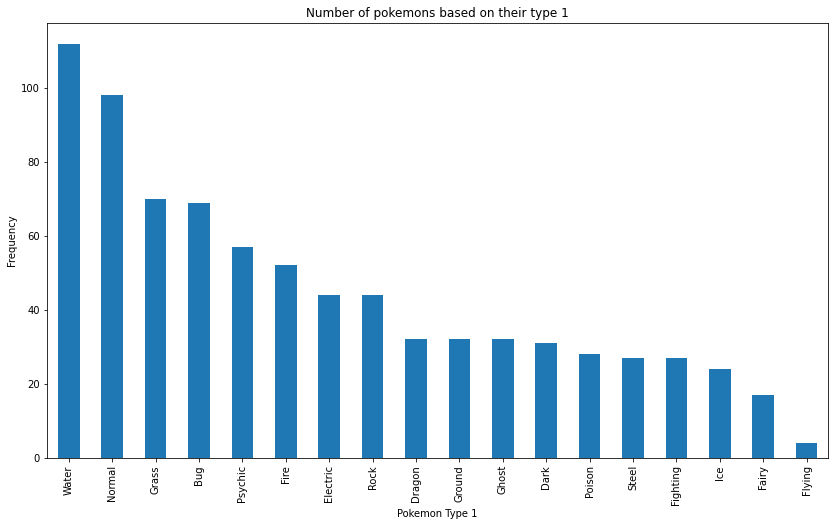

In [9]:
# Statistiques sur les pokémons classés par types 1
ax = dataset['TYP1'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of pokemons based on their type 1")
ax.set_xlabel("Pokemon Type 1")
ax.set_ylabel("Frequency")



Text(0, 0.5, 'Frequency')

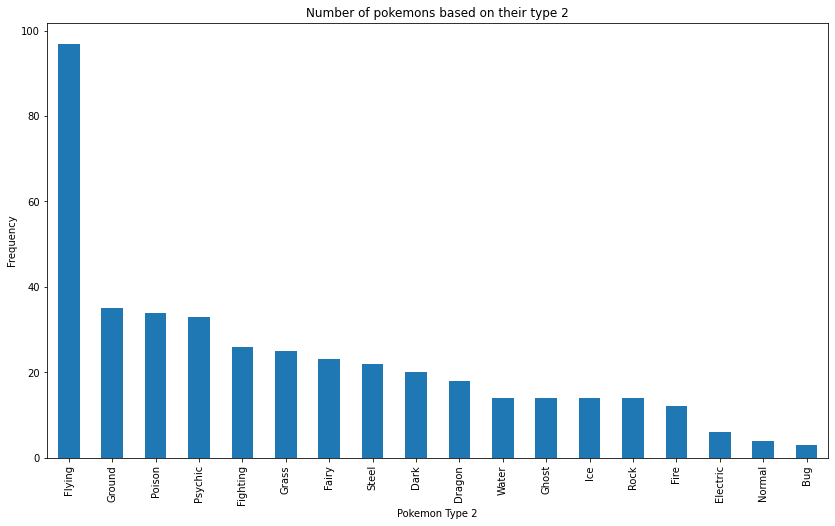

In [10]:
ax = dataset['TYP2'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Number of pokemons based on their type 2")
ax.set_xlabel("Pokemon Type 2")
ax.set_ylabel("Frequency")

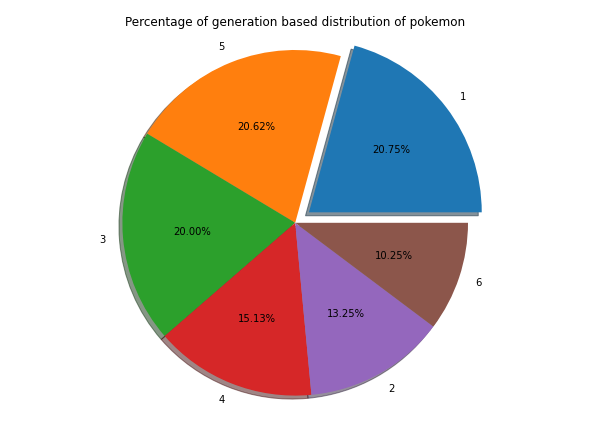

In [11]:
generation =  dict(dataset['GEN'].value_counts())
gen_counts = generation.values() # Nb de pokémon à chaque génération
gen = generation.keys()  # Type de génération

fig = plt.figure(figsize=(8, 6))
fig.suptitle("Percentage of generation based distribution of pokemon")
ax = fig.add_axes([0,0,1,1])
explode = (0.1, 0, 0, 0, 0, 0)
ax.axis('equal')


plt.pie(gen_counts, labels = gen,autopct='%1.2f%%', shadow=True, explode=explode)
plt.show()

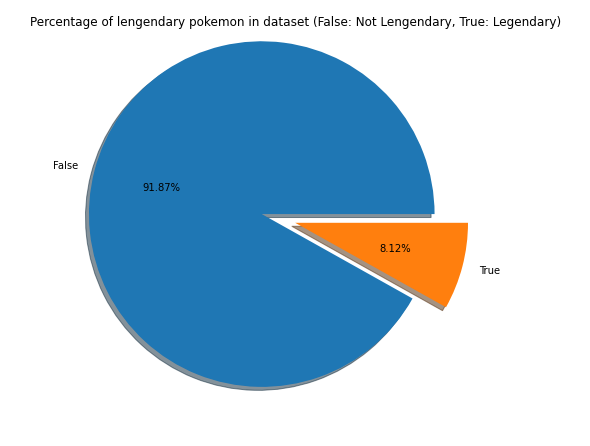

In [12]:
generation =  dict(dataset['LEG'].value_counts())
gen_counts = generation.values() 
gen = generation.keys()

fig = plt.figure(figsize=(8, 6))
fig.suptitle("Percentage of lengendary pokemon in dataset (False: Not Lengendary, True: Legendary)")
ax = fig.add_axes([0,0,1,1])
explode = (0.2, 0)  # explode 1st slice
ax.axis('equal')


plt.pie(gen_counts, labels = gen,autopct='%1.2f%%', shadow=True, explode=explode)
plt.show()




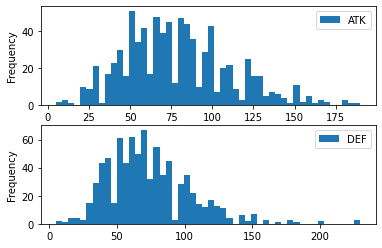

In [13]:
#Relation entre attaque et défense
fig, axes = plt.subplots(nrows=2,ncols=1)
dataset.plot(kind = "hist",y = "ATK",bins = 50, ax = axes[0])
dataset.plot(kind = "hist",y = "DEF",bins = 50,ax = axes[1])

plt.show()

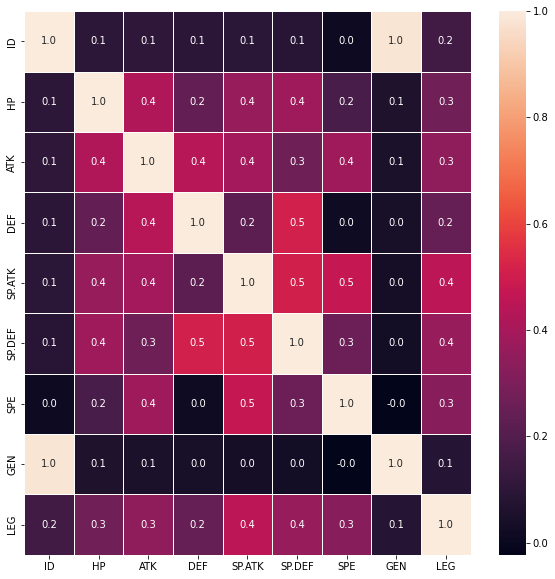

In [14]:
#Matrice de corrélation (vérification de la relation entre différentes quantités)

f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data=dataset.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()


### Features non utiles 
- NO
- NAME
- LEG
- GEN

### A réencoder 
- [ ] TYPE1
- [ ] TYP2
- [ ] Les statistiques de base d'un pokémon qui peuvent se résumer à une base stat qui est la somme des statistiques d'un pokémon

## A.3. Définition de la tâche, et choix d’une métrique de performance

> Cette partie consiste vraiment à suivre les questions (a,b,c) posées dans le TD 5. Pensez à regarder aussi le
corrigé de cet exercice/les exos équivalents dans les annales! Ici on donne quelques idées en plus:
Selon la complexité du dataset (estimée lors de la visualisation), viser un objectif non ridicule mais pas trop
ambitieux non plus (vous avez relativement peu de temps).
Selon le type de tâche ambitionnée (régression ou classification, etc), déterminer une ou des possibilités de
“métriques” qui constitueront votre score. Il faut faire attention aux biais dans les données: par exemple si les
différentes classes ne sont pas du tout équilibrées, il faut définir une métrique qui donne un poids conséquent y
compris aux classes peu fréquentes. Faites un premier choix rapidement, si il s’avère mauvais, vous corrigerez
plus tard.

-Objectif : Le but est de prédire l'issue d'un combat entre 2 pokémon en fonction de leurs statistiques et de leurs types
- Type de tâche : classification binaire, apprentissage supervisé 
- Structure des données (+ aspects du formatage) : on se basera sur le nom pour distinguer les pokémon et non le numéro; les données LEG, GEN ne sont pas pertinentes à conserver dans notre dataset
- Algo : On veut déterminer quel pokémon gagnera un combat entre 2 pokémon donc c'est une classification binaire. 
- Hyperparamètres, performance, métrique : 



tache : classification catégorielle pour les types 1 et 2, le reste est régressif

## B.1 Nettoyage (data cleaning), Encodage (encoding) et train-test-validation split

Aide: regardez le code dans `2022-101-CM-exemple-encodage-oneHot.ipynb`

> Cette partie consiste vraiment à suivre la question (e) posée dans le TD 5. Pensez à regarder aussi le corrigé
de cet exercice/les exos équivalents dans les annales! Ici on donne quelques idées en plus:
>
> Si les données ne sont pas propres, il se peut que vous ayez à les nettoyer. Par exemple, il se peut que
certaines valeurs soient manquantes (il faudra alors les remplacer par quelque chose, à choisir, ou modifier
l’algorithme d’apprentissage en conséquence). Une autre possibilité est que leur format soit problématique, par
exemple des images qui ne sont pas toutes de la même résolution, ou encore pas directement lisibles en python.
>
> Cette étape peut être réalisée une fois pour toute, en général.

Parfois aussi certaines features sont inutiles voire nuisibles, il faut les supprimer à la main.

In [15]:
## j'ai remarqué que dans la ligne 63 le name est null, donc je vais attribuer name "Abraa  ce pokemon
display(dataset.loc[dataset['NAME'].isnull()==True])
name = 'Abra'
dataset.loc[62, 'NAME'] = name
display(dataset[dataset['NAME']==name])

,ID,NAME,TYP1,TYP2,HP,ATK,DEF,SP.ATK,SP.DEF,SPE,GEN,LEG
62,63,NaN,Fighting,NaN,65,105,60,60,70,95,1,False


,ID,NAME,TYP1,TYP2,HP,ATK,DEF,SP.ATK,SP.DEF,SPE,GEN,LEG
62,63,Abra,Fighting,NaN,65,105,60,60,70,95,1,False
68,69,Abra,Psychic,NaN,25,20,15,105,55,90,1,False


In [16]:
#j'ai remplacé les valeurs NAN avec des valeurs 
dataset["TYP2"] = dataset["TYP2"].fillna("NA")

In [17]:
# on vérifie si ya pas NAN
dataset.isnull().sum()

ID        0
NAME      0
TYP1      0
TYP2      0
HP        0
ATK       0
DEF       0
SP.ATK    0
SP.DEF    0
SPE       0
GEN       0
LEG       0
dtype: int64

In [18]:
#S'il y a un enregistrement en double, on conserve le premier
dataset.duplicated(keep='first')

0      False
1      False
2      False
3      False
4      False
       ...  
795    False
796    False
797    False
798    False
799    False
Length: 800, dtype: bool

In [19]:
# Prend un dataset en paramètre et retourne le dataset nettoyé 
def cleanDataset(dataset):
    dataset['Total'] = dataset['HP'] + dataset['ATK'] + dataset['DEF'] + dataset['SP.ATK'] + dataset['SP.DEF'] + dataset['SPE']
    dataset = dataset.drop(columns=['ID','HP', 'ATK', 'DEF', 'SP.ATK', 'SP.DEF', 'SPE',"GEN", "LEG"])
    
    return dataset

In [20]:
cleanDataset = cleanDataset(dataset)

In [21]:
cleanDataset

,NAME,TYP1,TYP2,Total
0,Bulbasaur,Grass,Poison,318
1,Ivysaur,Grass,Poison,405
2,Venusaur,Grass,Poison,525
3,Mega Venusaur,Grass,Poison,625
4,Charmander,Fire,NA,309
...,...,...,...,...
795,Diancie,Rock,Fairy,600
796,Mega Diancie,Rock,Fairy,700
797,Hoopa Confined,Psychic,Ghost,600
798,Hoopa Unbound,Psychic,Dark,680


In [22]:
cleanDataset.shape

(800, 4)

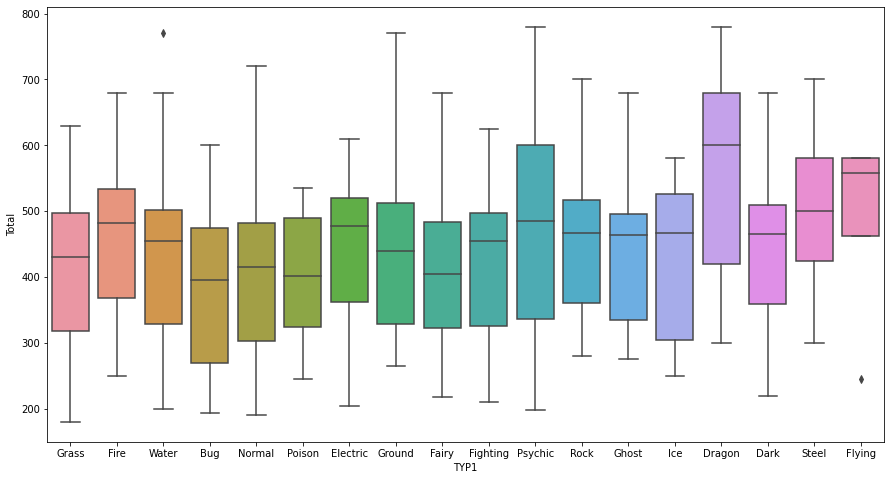

In [23]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x = 'TYP1', y = 'Total', data=cleanDataset)
plt.show()

In [24]:
cleanDataset.sort_values('Total',ascending=False).head(10)

,NAME,TYP1,TYP2,Total
426,Mega Rayquaza,Dragon,Flying,780
164,Mega Mewtwo Y,Psychic,NA,780
163,Mega Mewtwo X,Psychic,Fighting,780
422,Primal Kyogre,Water,NA,770
424,Primal Groudon,Ground,Fire,770
552,Arceus,Normal,NA,720
712,Kyurem White Kyurem,Dragon,Ice,700
711,Kyurem Black Kyurem,Dragon,Ice,700
409,Mega Salamence,Dragon,Flying,700
413,Mega Metagross,Steel,Psychic,700


In [25]:
dataset[['TYP1', 'TYP2']] = dataset[['TYP1','TYP2']].astype('category')

In [26]:
dataset.dtypes

ID           int64
NAME        object
TYP1      category
TYP2      category
HP           int64
ATK          int64
DEF          int64
SP.ATK       int64
SP.DEF       int64
SPE          int64
GEN          int64
LEG           bool
Total        int64
dtype: object

In [27]:
def encodeDataset(dataset):
    dataset['Total'] = dataset['HP'] + dataset['ATK'] + dataset['DEF'] + dataset['SP.ATK'] + dataset['SP.DEF'] + dataset['SPE']
    dataset = dataset.drop(columns=['HP','ATK', 'DEF', 'SP.ATK', 'SP.DEF', 'SPE',"GEN", "LEG"])
    
    
        
    data_dummies= pd.get_dummies(dataset, columns=['TYP1' ,'TYP2'])
    x_onehot = OneHotEncoder().fit_transform(data_dummies)
    return data_dummies

In [28]:
encodeDataset(dataset)

,ID,NAME,Total,TYP1_Bug,TYP1_Dark,TYP1_Dragon,TYP1_Electric,TYP1_Fairy,TYP1_Fighting,TYP1_Fire,...,TYP2_Grass,TYP2_Ground,TYP2_Ice,TYP2_NA,TYP2_Normal,TYP2_Poison,TYP2_Psychic,TYP2_Rock,TYP2_Steel,TYP2_Water
0,1,Bulbasaur,318,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2,Ivysaur,405,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,3,Venusaur,525,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Mega Venusaur,625,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Charmander,309,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,600,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
796,797,Mega Diancie,700,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
797,798,Hoopa Confined,600,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
798,799,Hoopa Unbound,680,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Train test split 

Si vous comptez utiliser la cross vlaidation automatique de sklearn, pas besoin de définir à la main le validation set.
Dans ce cas il suffir d'avoir un train set et un test set. Le train set sera découpé de différentes façon lors de la Cross-Validation, et la moyenne sera calculée automatiquement.


> C’est aussi le moment de définir le train set, validation set, et test set. Assez souvent, il suffit de mélanger les
données (par exemple si MNIST venait avec les chiffres triés dans l’ordre, il faudrait mélanger pour que le test
set ne soit pas rempli que de 8 et de 9!). Mais attention, parfois on ne peut pas tout mélanger d’un coup, par
exemple si les données sont issues d’une série temporelle et sont donc corrélées, il faut autant que possible laisser
ensemble les points proches dans le temps (car corrélés), et séparer les données entre les sets train/validation/test
de sorte que ces 3 jeux de données soient indépendants (contiennent des données indépendantes).

In [29]:
filename = "combats.csv"
names = ['First_pokemon', 'Second_pokemon', 'Winner']
combat = pd.read_csv(filename)
combat.head(4)

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683


In [30]:
X.shape 

(800, 11)

In [31]:
names

['First_pokemon', 'Second_pokemon', 'Winner']

In [32]:
combatDataFit=combat[names].replace(encodeDataset(dataset).NAME)
combatDataFit

,First_pokemon,Second_pokemon,Winner
0,Pupitar,Shiftry,Shiftry
1,Tornadus Incarnate Forme,Virizion,Virizion
2,Natu,Litwick,Litwick
3,Magcargo,Golett,Golett
4,Kabuto,Heracross,Kabuto
...,...,...,...
49995,Zekrom,Seadra,Zekrom
49996,Excadrill,Eelektrik,Excadrill
49997,Ralts,Seviper,Seviper
49998,Electrode,Magneton,Electrode


In [33]:
def XY():
    X = combatDataFit.drop(columns='Winner')
    Y = combatDataFit.drop(columns=["First_pokemon", "Second_pokemon"])
    merge1 = encodeDataset(dataset).merge(X, left_on='NAME', right_on='First_pokemon')
    final = merge1.merge(encodeDataset(dataset), left_on='Second_pokemon', right_on='NAME')
    newX = final.sort_values('ID_x')
    merge1 = encodeDataset(dataset).merge(Y, left_on='NAME', right_on='Winner')
    newY = merge1.drop(columns="Winner")
    
    return newX, newY
X, Y = XY()

In [34]:
X

,ID_x,NAME_x,Total_x,TYP1_Bug_x,TYP1_Dark_x,TYP1_Dragon_x,TYP1_Electric_x,TYP1_Fairy_x,TYP1_Fighting_x,TYP1_Fire_x,...,TYP2_Grass_y,TYP2_Ground_y,TYP2_Ice_y,TYP2_NA_y,TYP2_Normal_y,TYP2_Poison_y,TYP2_Psychic_y,TYP2_Rock_y,TYP2_Steel_y,TYP2_Water_y
0,2,Ivysaur,405,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1096,2,Ivysaur,405,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
69,2,Ivysaur,405,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
68,2,Ivysaur,405,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3667,2,Ivysaur,405,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19797,800,Volcanion,600,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
26614,800,Volcanion,600,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
19664,800,Volcanion,600,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
15577,800,Volcanion,600,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [35]:
Y

,ID,NAME,Total,TYP1_Bug,TYP1_Dark,TYP1_Dragon,TYP1_Electric,TYP1_Fairy,TYP1_Fighting,TYP1_Fire,...,TYP2_Grass,TYP2_Ground,TYP2_Ice,TYP2_NA,TYP2_Normal,TYP2_Poison,TYP2_Psychic,TYP2_Rock,TYP2_Steel,TYP2_Water
0,2,Ivysaur,405,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2,Ivysaur,405,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2,Ivysaur,405,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2,Ivysaur,405,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2,Ivysaur,405,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50043,800,Volcanion,600,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
50044,800,Volcanion,600,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
50045,800,Volcanion,600,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
50046,800,Volcanion,600,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [55]:
type1X = X.filter(regex="TYP1")
type1X = type1X.filter(regex="_x")
type1Y = X.filter(regex="TYP1")
type1Y = type1Y.filter(regex="_y")
type1X=type1X.assign(TYP1_NA_x=0)
#X=X.assign(Coeff_x=0)

for i in type1Y.columns:
    newname = i.replace('_y', '_x')
    newname = newname.replace('TYP2', 'TYP1')
    type1Y.rename(columns = {i:newname}, inplace = True)
    
indexOrder = ['TYP1_Bug_x', 'TYP1_Dark_x', 'TYP1_Dragon_x', 'TYP1_Electric_x',
       'TYP1_Fairy_x', 'TYP1_Fighting_x', 'TYP1_Fire_x', 'TYP1_Flying_x',
       'TYP1_Ghost_x', 'TYP1_Grass_x', 'TYP1_Ground_x', 'TYP1_Ice_x',
       'TYP1_Normal_x', 'TYP1_Poison_x', 'TYP1_Psychic_x', 'TYP1_Rock_x',
       'TYP1_Steel_x', 'TYP1_Water_x', 'TYP1_NA_x']

type1X = type1X.reindex(columns=indexOrder)
type1Y = type1Y.reindex(columns=indexOrder)

In [56]:
def parcoursType(typeI):
    dicoPoke = {}
    for i in typeI.iterrows():
        index = i[0]
        for t in indexOrder:
            val = i[1][t]
            if val == 1:
                dicoPoke[index] = [t]
    return dicoPoke

T1Dico = parcoursType(type1X)
T2Dico = parcoursType(type1Y)

for key, val in T1Dico.items():
    T1Dico[key].append(T2Dico[key])
    
T1Dico

{0: ['TYP1_Grass_x', ['TYP1_Ground_x']],
 1096: ['TYP1_Grass_x', ['TYP1_Ghost_x']],
 69: ['TYP1_Grass_x', ['TYP1_Normal_x']],
 68: ['TYP1_Grass_x', ['TYP1_Normal_x']],
 3667: ['TYP1_Grass_x', ['TYP1_Poison_x']],
 1536: ['TYP1_Grass_x', ['TYP1_Water_x']],
 3724: ['TYP1_Grass_x', ['TYP1_Fire_x']],
 2579: ['TYP1_Grass_x', ['TYP1_Electric_x']],
 2578: ['TYP1_Grass_x', ['TYP1_Electric_x']],
 1403: ['TYP1_Grass_x', ['TYP1_Water_x']],
 3791: ['TYP1_Grass_x', ['TYP1_Bug_x']],
 1033: ['TYP1_Grass_x', ['TYP1_Water_x']],
 2965: ['TYP1_Grass_x', ['TYP1_Normal_x']],
 2197: ['TYP1_Grass_x', ['TYP1_Normal_x']],
 1273: ['TYP1_Grass_x', ['TYP1_Poison_x']],
 3853: ['TYP1_Grass_x', ['TYP1_Fire_x']],
 3914: ['TYP1_Grass_x', ['TYP1_Bug_x']],
 2131: ['TYP1_Grass_x', ['TYP1_Electric_x']],
 1598: ['TYP1_Grass_x', ['TYP1_Ground_x']],
 390: ['TYP1_Grass_x', ['TYP1_Bug_x']],
 322: ['TYP1_Grass_x', ['TYP1_Electric_x']],
 3599: ['TYP1_Grass_x', ['TYP1_Psychic_x']],
 3545: ['TYP1_Grass_x', ['TYP1_Dragon_x']],
 3215

In [57]:
X

,ID_x,NAME_x,Total_x,TYP1_Bug_x,TYP1_Dark_x,TYP1_Dragon_x,TYP1_Electric_x,TYP1_Fairy_x,TYP1_Fighting_x,TYP1_Fire_x,...,TYP2_Ground_y,TYP2_Ice_y,TYP2_NA_y,TYP2_Normal_y,TYP2_Poison_y,TYP2_Psychic_y,TYP2_Rock_y,TYP2_Steel_y,TYP2_Water_y,Coeff_x
0,2,Ivysaur,405,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1096,2,Ivysaur,405,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69,2,Ivysaur,405,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
68,2,Ivysaur,405,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3667,2,Ivysaur,405,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19797,800,Volcanion,600,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
26614,800,Volcanion,600,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
19664,800,Volcanion,600,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
15577,800,Volcanion,600,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [58]:
X

,ID_x,NAME_x,Total_x,TYP1_Bug_x,TYP1_Dark_x,TYP1_Dragon_x,TYP1_Electric_x,TYP1_Fairy_x,TYP1_Fighting_x,TYP1_Fire_x,...,TYP2_Ground_y,TYP2_Ice_y,TYP2_NA_y,TYP2_Normal_y,TYP2_Poison_y,TYP2_Psychic_y,TYP2_Rock_y,TYP2_Steel_y,TYP2_Water_y,Coeff_x
0,2,Ivysaur,405,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1096,2,Ivysaur,405,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69,2,Ivysaur,405,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
68,2,Ivysaur,405,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3667,2,Ivysaur,405,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19797,800,Volcanion,600,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
26614,800,Volcanion,600,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
19664,800,Volcanion,600,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
15577,800,Volcanion,600,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [75]:
def COEFF(TDico):
        
    very_effective_dict = {'TYP1_Normal_x': [],
                           'TYP1_Fighting_x': ['TYP1_Normal_x', 'TYP1_Rock_x', 'TYP1_Steel_x', 'TYP1_Ice_x', 'TYP1_Dark_x'],
                           'TYP1_Flying_x': ['TYP1_Fighting_x', 'TYP1_Bug_x', 'TYP1_Grass_x'],
                           'TYP1_Poison_x': ['TYP1_Grass_x', 'TYP1_Fairy_x'],
                           'TYP1_Ground_x': ['TYP1_Poison_x', 'TYP1_Rock_x', 'TYP1_Steel_x', 'TYP1_Fire_x', 'TYP1_Electric_x'],
                           'TYP1_Rock_x': ['TYP1_Flying_x', 'TYP1_Bug_x', 'TYP1_Fire_x', 'TYP1_Ice_x'],
                           'TYP1_Bug_x': ['TYP1_Grass_x', 'TYP1_Psychic_x', 'TYP1_Dark_x'],
                           'TYP1_Ghost_x': ['TYP1_Ghost_x', 'TYP1_Psychic_x'],
                           'TYP1_Steel_x': ['TYP1_Rock_x', 'TYP1_Ice_x', 'TYP1_Fairy_x'],
                           'TYP1_Fire_x': ['TYP1_Bug_x', 'TYP1_Steel_x', 'TYP1_Grass_x', 'TYP1_Ice_x'],
                           'TYP1_Water_x': ['TYP1_Ground_x', 'TYP1_Rock_x', 'TYP1_Fire_x'],
                           'TYP1_Grass_x': ['TYP1_Ground_x', 'TYP1_Rock_x', 'TYP1_Water_x'],
                           'TYP1_Electric_x': ['TYP1_Flying_x', 'TYP1_Water_x'],
                           'TYP1_Psychic_x': ['TYP1_Fighting_x', 'TYP1_Poison_x'],
                           'TYP1_Ice_x': ['TYP1_Flying_x', 'TYP1_Ground_x', 'TYP1_Grass_x', 'TYP1_Dragon_x'],
                           'TYP1_Dragon_x': ['TYP1_Dragon_x'],
                           'TYP1_Dark_x': ['TYP1_Ghost_x', 'TYP1_Psychic_x'],
                           'TYP1_Fairy_x': ['TYP1_Fighting_x', 'TYP1_Dragon_x', 'TYP1_Dark_x'],
                           'TYP1_NA_x': []}
    
    not_very_effective_dict = {'TYP1_Normal_x': ['TYP1_Rock_x', 'TYP1_Steel_x'],
                               'TYP1_Fighting_x': ['TYP1_Flying_x', 'TYP1_Poison_x', 'TYP1_Bug_x', 'TYP1_Psychic_x', 'TYP1_Fairy_x'],
                               'TYP1_Flying_x': ['TYP1_Rock_x', 'TYP1_Steel_x', 'TYP1_Electric_x'],
                               'TYP1_Poison_x': ['TYP1_Poison_x', 'TYP1_Rock_x', 'TYP1_Ground_x', 'TYP1_Ghost_x'],
                               'TYP1_Ground_x': ['TYP1_Bug_x', 'TYP1_Grass_x'],
                               'TYP1_Rock_x': ['TYP1_Fighting_x', 'TYP1_Ground_x', 'TYP1_Steel_x'],
                               'TYP1_Bug_x': ['TYP1_Fighting_x', 'TYP1_Flying_x', 'TYP1_Poison_x', 'TYP1_Ghost_x', 'TYP1_Steel_x', 'TYP1_Fire_x', 'TYP1_Fairy_x'],
                               'TYP1_Ghost_x': ['TYP1_Dark_x'],
                               'TYP1_Steel_x': ['TYP1_Steel_x', 'TYP1_Fire_x', 'TYP1_Water_x', 'TYP1_Electric_x'],
                               'TYP1_Fire_x': ['TYP1_Rock_x', 'TYP1_Fire_x', 'TYP1_Water_x', 'TYP1_Dragon_x'],
                               'TYP1_Water_x': ['TYP1_Water_x', 'TYP1_Grass_x', 'TYP1_Dragon_x'],
                               'TYP1_Grass_x': ['TYP1_Flying_x', 'TYP1_Poison_x', 'TYP1_Bug_x', 'TYP1_Steel_x', 'TYP1_Fire_x', 'TYP1_Grass_x', 'TYP1_Dragon_x'],
                               'TYP1_Electric_x': ['TYP1_Grass_x', 'Electric', 'TYP1_Dragon_x'],
                               'TYP1_Psychic_x': ['TYP1_Steel_x', 'TYP1_Psychic_x'],
                               'TYP1_Ice_x': ['TYP1_Steel_x', 'TYP1_Fire_x', 'TYP1_Water_x', 'TYP1_Psychic_x'],
                               'TYP1_Dragon_x': ['TYP1_Steel_x'],
                               'TYP1_Dark_x': ['TYP1_Fighting_x', 'TYP1_Dark_x', 'TYP1_Fairy_x'],
                               'TYP1_Fairy_x': ['TYP1_Poison_x', 'TYP1_Steel_x', 'TYP1_Fire_x'],
                               'TYP1_NA_x': []}
    
    
    
    coeffTX = [1] * 50127
    i = 0
    for key, val in TDico.items():
        Tx = val[0]
        Ty = val[1]
        
        for superEffective in very_effective_dict[Tx]:
            if superEffective in Ty: 
                #print(Tx, " est super efficace contre ", Ty, " -> x2")
                coeffTX[i] = 2
        
        for lessEffective in not_very_effective_dict[Tx]:
            if lessEffective in Ty: 
                #print(Tx, " est pas très efficace contre ", Ty, " -> x0.5")
                coeffTX[i] = 0.5
                

        i = i + 1
    return coeffTX
    
coeffX = COEFF(T1Dico)
coeffX = np.array(coeffX)
X['Coeff_x'] = coeffX.tolist()
X.columns

#perteHPMoyen = ((ATK / (DEF*50)) * COEFF

,ID_x,NAME_x,Total_x,TYP1_Bug_x,TYP1_Dark_x,TYP1_Dragon_x,TYP1_Electric_x,TYP1_Fairy_x,TYP1_Fighting_x,TYP1_Fire_x,...,TYP2_Ground_y,TYP2_Ice_y,TYP2_NA_y,TYP2_Normal_y,TYP2_Poison_y,TYP2_Psychic_y,TYP2_Rock_y,TYP2_Steel_y,TYP2_Water_y,Coeff_x
0,2,Ivysaur,405,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.0
1096,2,Ivysaur,405,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
69,2,Ivysaur,405,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1.0
68,2,Ivysaur,405,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1.0


In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, X_train, Y_test = train_test_split(np.array(X), np.array(Y), test_size=0.2)
print('train set:', X_train.shape)
print('test set:', X_test.shape)

ValueError: Found input variables with inconsistent numbers of samples: [50127, 50048]

In [ ]:
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import accuracy_score


#clf = RandomForestClassifier(n_estimators=100)
#model = clf.fit(X_train, X_train)
#pred = model.predict(X_test)
#print('Accuracy of ', accuracy_score(pred, Y_test)*100)

In [ ]:
retour = sklearn.model_selection.cross_val_score(monModele, X_train, Y_train, cv=5)

## B.2 Optimisations

Aide: regardez les codes dans `2022-91.2-exemple-Optimization1Hyper-param.ipynb` et dans `TP-PCA+SVM-parties1-2-3-enonce.ipynb`

> Cette partie consiste à travailler à fond, et donc à expérimenter concrètement sur le choix du modèle (cf. la
spéculation demandée en question (e) du TD 5. C’est donc surtout une partie qui fait écho aux exercices 6,
et plus particulièrement 6.2,6.3.
Cette étape peut être itérée plusieurs fois, selon que vos résultats vous semblent suffisamment satisfaisants.

#### 2.1 Architecture
> Il va falloir choisir une architecture, c.a.d. le genre de modèle de ML utilisé pour fitter ou modéliser les données (“apprendre” quelque chose).
>
> On rappelle ici les méthodes qui seront vues en cours (liste approximative):
> 
> Pre-processings:
> - standardization
> - PCA 
> - équilibrage des classes (différentes stratégies possibles)
> 
> Algos de classification ou régression:
> - Régression (linéaire ou polynomiale)
> - Perceptron (à une couche)
> - SVC (SVM, pour la Classification)
> - SVR (SVM, pour la Regression)
> - Decision Trees
> - Regression Trees
> - Modèle Bayésien Naïf (Bernoulli ou Gauss ou autre) (utile pour la classif de texte)
> - K-Nearest Neighbors (classif)
> 
> A combiner avec (Certaines des) méthodes précédentes:
> - Feature Maps / Kernels Noyaux -- polynomial, RBF  (Les feature maps peuvent etre vues comme un pre-processing, mais un Kernel doit etre appliqué à la volée).


#### 2.2 Choix d’hyper-paramètres

> Pour chaque méthode (dans sklearn), il y a en général un certain nombre d’hyper-paramètres associés, qu’il
> vous est nécessaire de choisir. Il y a parfois aussi des paramètres de méthode qui servent seulement à imposer la
> méthode de résolution numérique du modèle. On ne vous demande pas spécialement d’optimiser ces paramètres
> là.
> 
> Remarque/rappel: le choix de l’architecture est en soi un hyper-paramètre. La taille du training set en est
> aussi un.
> 
> Lorsque vous chercherez à optimiser des hyper-paramètres, n’oubliez pas :
> - De mettre en place une cross-validation
> - de tracer les résultats sous forme graphique (et pas seulement afficher des chiffres)
> - Ne vous lancez pas dans une recherche systématique sur plus de 2 hyper-paramètres à la fois
> - Si les calculs sont très lents, réduisez la taille du train set, mais seulement tant que ça vous coûte peu en termes > de performance.
> - Si les calculs sont très lents, envisagez de comprimer les features d’entrée (PCA), même si ça vous coûte un peu en > termes de performance.


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_forest = RandomForestRegressor(n_estimators = 10, random_state = 0)

In [ ]:
model_forest.fit(X_train, Y_train)

In [ ]:
train(X_train, X_test, Y_train, Y_test,model_forest)

## C.1 3  Test set, présentation des résultats

Vous êtes sûrs de votre coup ? Vous avez bien exploité le validation set, mesuré par cross-validation, estimé l'intervalle d'incertitude ?
Ok, allez y sur le test set ! 

> Pensez à regarder les différentes mesures de scores envisagées au départ sur l’ensemble de validation (une fois
> vos hyper-paramètres fixés). Vérifiez qu’il n’y a pas un gros problème que vous n’auriez pas vu. Si les résultats
> sont raisonnablement satisfaisants, allez y avec le test set ! (Bref, ne trichez pas lors du test !)
> 
> Lorsque vous présenterez vos résultats (mesures de score, performances), vous mettrez en avant les perfor-
> mances sur le test set, mais il est bon de les accompagner des performances mesurées sur le validation set, et
> sur le train set, pour permettre de comparer. 
**(toutes choses égales par ailleurs, évidemment, donc avec les mêmes hyper-paramètres)**
> 
> Pour l’analyse plus qualitative des prédictions, certaines visualisations ne permettent pas de présenter simultanément plusieurs résultats (par exemple si ce sont des images reconstruites, etc). Dans ce cas, privilégiez
> toujours le test set.
> 
> Ne vous focalisez pas seulement sur la performance quantitative (la valeur du score), essayez d’analyser la
> façon dont les résultats dépendent de vos choix (même si le niveau total n’est “pas très bon”).
**Évidemment, si vous voulez présenter l'impact d'un hyper-paramètre sur le score, logiquement, il faut le faire sur le validation set (en tout cas, observer ça sur le test set n'autorise pas à changer d'avis sur les hyper-paramètres**

## D. Préparez l'oral !!

Mais ça ne se passe pas dans un jupyter notebook ! :P

voir les pages 28-31 du poly pour des conseils pour l'oral !